In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from util.functions import area_latlon # grid area in km^2
from util.gamap_colormap import WhGrYlRd

In [3]:
#fname = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2020-04/CT2019.flux1x1-monthly.nc' # cant open, time dimension issue. ncks -C -O -x -v time_components CT2019.flux1x1-monthly.nc mytest.nc
fname = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2020-04/mytest.nc'
ds_ct  = xr.open_dataset(fname)
ds_ct

<xarray.Dataset>
Dimensions:          (latitude: 180, longitude: 360, time: 228)
Coordinates:
  * latitude         (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * longitude        (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * time             (time) datetime64[ns] 2000-01-16T12:00:00 ... 2018-12-16T12:00:00
Data variables:
    bio_flux_opt     (time, latitude, longitude) float64 ...
    decimal_time     (time) float64 ...
    fire_flux_imp    (time, latitude, longitude) float64 ...
    fossil_flux_imp  (time, latitude, longitude) float64 ...
    ocn_flux_opt     (time, latitude, longitude) float64 ...
Attributes:
    averaging_period_length_hours:  744
    email:                          carbontracker.team@noaa.gov
    url:                            http://carbontracker.noaa.gov
    institution:                    NOAA Earth System Research Laboratory
    Conventions:                    CF-1.5
    history:                        Tue May  5 10:40:44 2020: ncks -C -O -x -...
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    nco_openmp_thread_number:       1
    version:                        CT2019 1x1 3-hourly fluxes as of 2019-11-...

In [4]:
# ocean fluxes
varname = 'ocn_flux_opt'

lon_res = 1.
lat_res = 1.
days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]

ocn_emi = []
year_vector = np.arange(2000,2019,1)

for iyear in range(1,20):
    a = iyear*12
    dr_ocean = ds_ct[varname][(a-12):a,:,:]
    
    for ilat, lat in enumerate(dr_ocean.latitude):
        for imonth in range(12):
            area_tmp = area_latlon(lat1 = lat, 
                                lon1 = dr_ocean.longitude[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = dr_ocean.longitude[10].values + lon_res)
            dr_ocean[imonth,ilat,:] = dr_ocean[imonth,ilat,:] * area_tmp * days_in_month[imonth] * 24*3600 * 12 *1e3 # unit: kgC/month
    ocean_annual = dr_ocean.sum(dim = 'time')
    total = dr_ocean.sum()       # kgC/year, same as data description
    ann_total_ocean = total.values*1e-12  # GtC/yr
    
    ocn_emi.append(ann_total_ocean)
    print(str(year_vector[iyear-1]) + ': ' + str(ann_total_ocean))

2000: -1.740637636332383
2001: -1.9171220967401066
2002: -1.1295729506934094
2003: -1.7018729129337498
2004: -2.5434446470723544
2005: -1.9827668566721424
2006: -3.361743508019168
2007: -2.9629429328441406
2008: -3.0007134308078074
2009: -3.320937168651201
2010: -3.1560546882166416
2011: -3.4178239935767816
2012: -3.1117901149326004
2013: -2.860687697707696
2014: -3.211972630294712
2015: -3.1919507507266407
2016: -3.1630341385893237
2017: -4.393271522357361
2018: -3.802035616629181


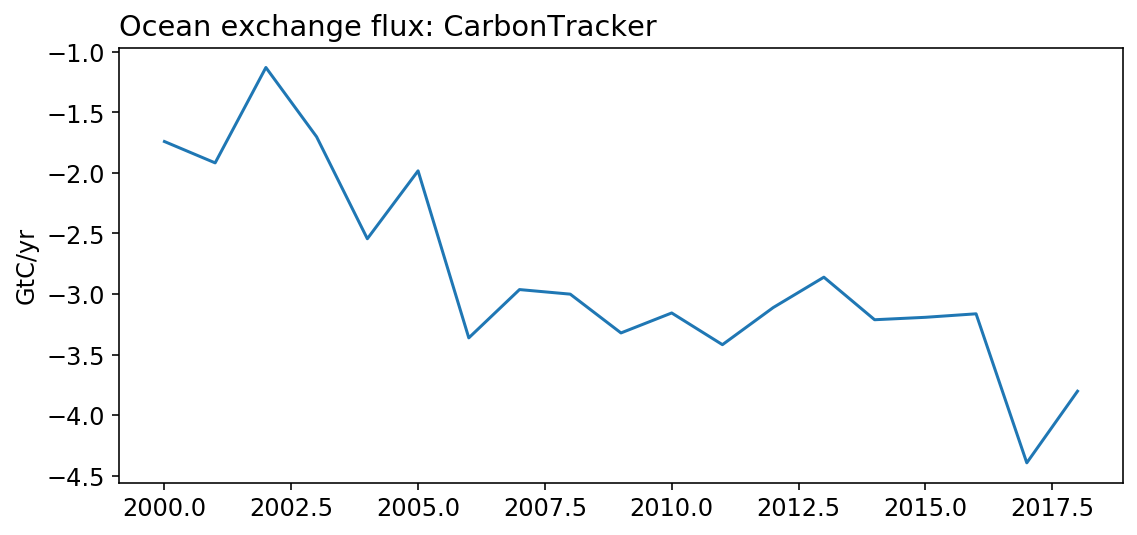

In [5]:
# plot of emission evolution for EU28, and future reduction plan

fig = plt.figure(figsize=[9, 4])
plt.title('Ocean exchange flux: CarbonTracker', loc='left')

plt.plot(year_vector, ocn_emi)

plt.ylabel('GtC/yr')

output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
#fig.savefig(output_dir + '/ocean_fluxes.png', dpi = 300)

In [6]:
# biospheric flux
varname = 'bio_flux_opt'

lon_res = 1.
lat_res = 1.
days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]

bio_emi = []
year_vector = np.arange(2000,2019,1)

for iyear in range(1,20):
    a = iyear*12
    dr_ocean = ds_ct[varname][(a-12):a,:,:]
    
    for ilat, lat in enumerate(dr_ocean.latitude):
        for imonth in range(12):
            area_tmp = area_latlon(lat1 = lat, 
                                lon1 = dr_ocean.longitude[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = dr_ocean.longitude[10].values + lon_res)
            dr_ocean[imonth,ilat,:] = dr_ocean[imonth,ilat,:] * area_tmp * days_in_month[imonth] * 24*3600 * 12 *1e3 # unit: kgC/month
    ocean_annual = dr_ocean.sum(dim = 'time')
    total = dr_ocean.sum()       # kgC/year, same as data description
    ann_total_ocean = total.values*1e-12  # GtC/yr
    
    bio_emi.append(ann_total_ocean)
    print(str(year_vector[iyear-1]) + ': ' + str(ann_total_ocean))

2000: -5.337608253461623
2001: -4.3881188333469865
2002: -4.046543218345014
2003: -4.241032785286298
2004: -4.897501614135536
2005: -4.646352107337507
2006: -4.331580773566951
2007: -4.126025675783897
2008: -5.041845047041821
2009: -4.0276315605351
2010: -3.9890565099701805
2011: -5.246775998945525
2012: -4.003371768534894
2013: -4.399208026038435
2014: -5.235013433453698
2015: -3.531066220002383
2016: -3.1087458423397023
2017: -3.63640402228801
2018: -4.364956989365421


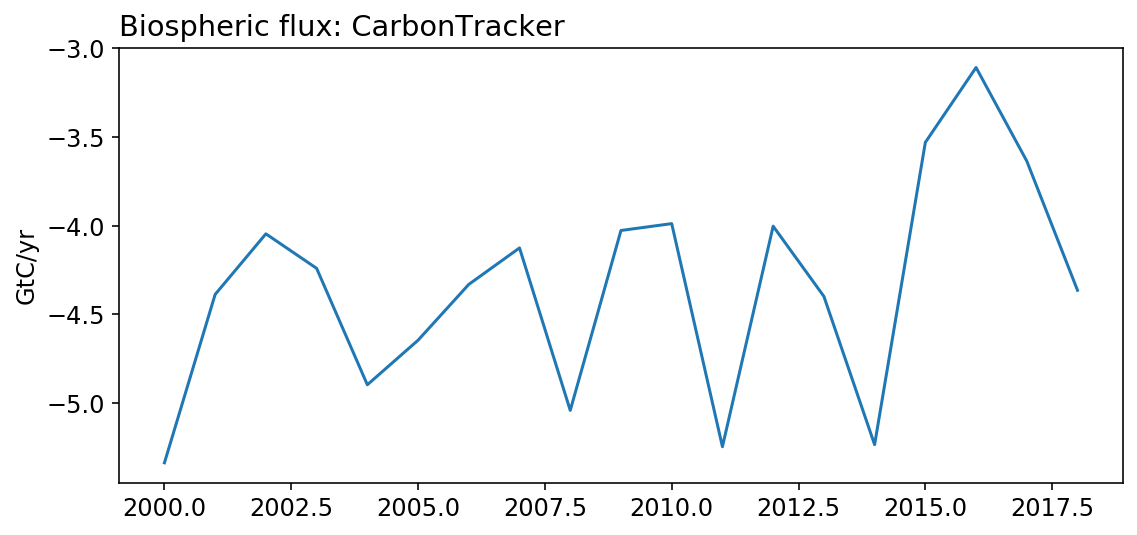

In [7]:
# plot 
fig = plt.figure(figsize=[9, 4])
plt.title('Biospheric flux: CarbonTracker', loc='left')

plt.plot(year_vector, bio_emi)

plt.ylabel('GtC/yr')

output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
#fig.savefig(output_dir + '/ocean_fluxes.png', dpi = 300)

In [8]:
# anthop. flux
varname = 'fossil_flux_imp'

lon_res = 1.
lat_res = 1.
days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]

ff_emi = []
year_vector = np.arange(2000,2019,1)

for iyear in range(1,20):
    a = iyear*12
    dr_ocean = ds_ct[varname][(a-12):a,:,:]
    
    for ilat, lat in enumerate(dr_ocean.latitude):
        for imonth in range(12):
            area_tmp = area_latlon(lat1 = lat, 
                                lon1 = dr_ocean.longitude[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = dr_ocean.longitude[10].values + lon_res)
            dr_ocean[imonth,ilat,:] = dr_ocean[imonth,ilat,:] * area_tmp * days_in_month[imonth] * 24*3600 * 12 *1e3 # unit: kgC/month
    ocean_annual = dr_ocean.sum(dim = 'time')
    total = dr_ocean.sum()       # kgC/year, same as data description
    ann_total_ocean = total.values*1e-12  # GtC/yr
    
    ff_emi.append(ann_total_ocean)
    print(str(year_vector[iyear-1]) + ': ' + str(ann_total_ocean))

2000: 6.681444116155591
2001: 6.860573432171038
2002: 6.962990049439251
2003: 7.33993296012396
2004: 7.6867021625456085
2005: 8.004622400884253
2006: 8.29600769170515
2007: 8.466318957978727
2008: 8.712687401743304
2009: 8.665184789171521
2010: 9.085348850132275
2011: 9.46120563460886
2012: 9.605944240168503
2013: 9.731958638122249
2014: 9.816649234534228
2015: 9.8057793765911
2016: 9.822274141512795
2017: 9.951212109676568
2018: 10.161847159773812


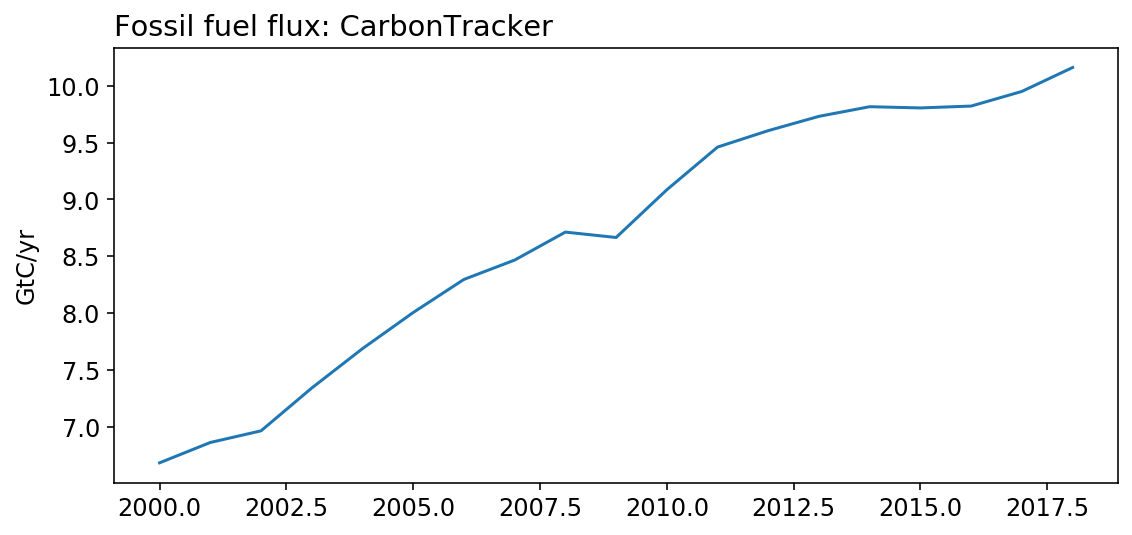

In [9]:
# plot 
fig = plt.figure(figsize=[9, 4])
plt.title('Fossil fuel flux: CarbonTracker', loc='left')

plt.plot(year_vector, ff_emi)

plt.ylabel('GtC/yr')

output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
#fig.savefig(output_dir + '/ocean_fluxes.png', dpi = 300)

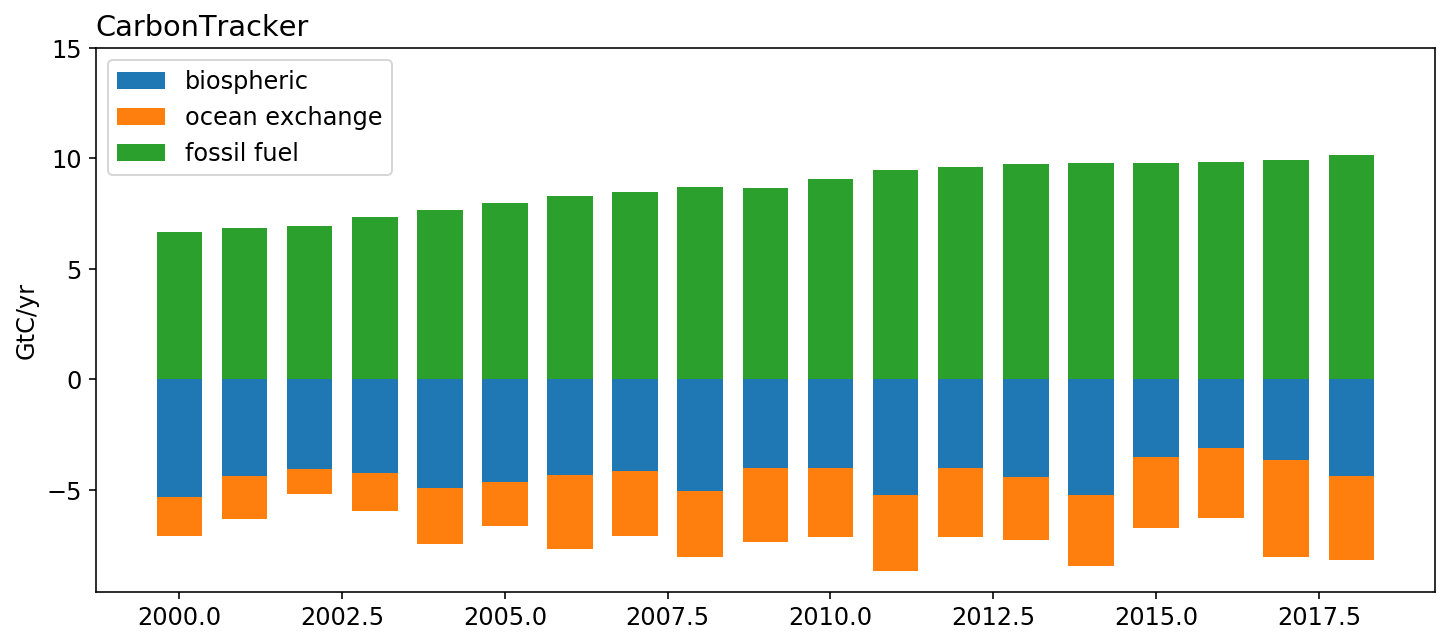

In [10]:
# plot 
fig = plt.figure(figsize=[12, 5])
plt.title('CarbonTracker', loc='left')

#plt.plot(year_vector, ff_emi, label = 'fossil fuel')
#plt.plot(year_vector, ocn_emi, label = 'ocean exchange')
#plt.plot(year_vector, bio_emi, label = 'biospheric')
width = 0.7
p1 = plt.bar(year_vector, bio_emi, width, label = 'biospheric')
p2 = plt.bar(year_vector, ocn_emi, width, bottom=bio_emi, label = 'ocean exchange')
p3 = plt.bar(year_vector, ff_emi, width, label = 'fossil fuel')

plt.ylim(top = 15)
plt.ylabel('GtC/yr')
plt.legend(loc=2)

output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
fig.savefig(output_dir + '/carbontracker_all_fluxes.png', dpi = 300)

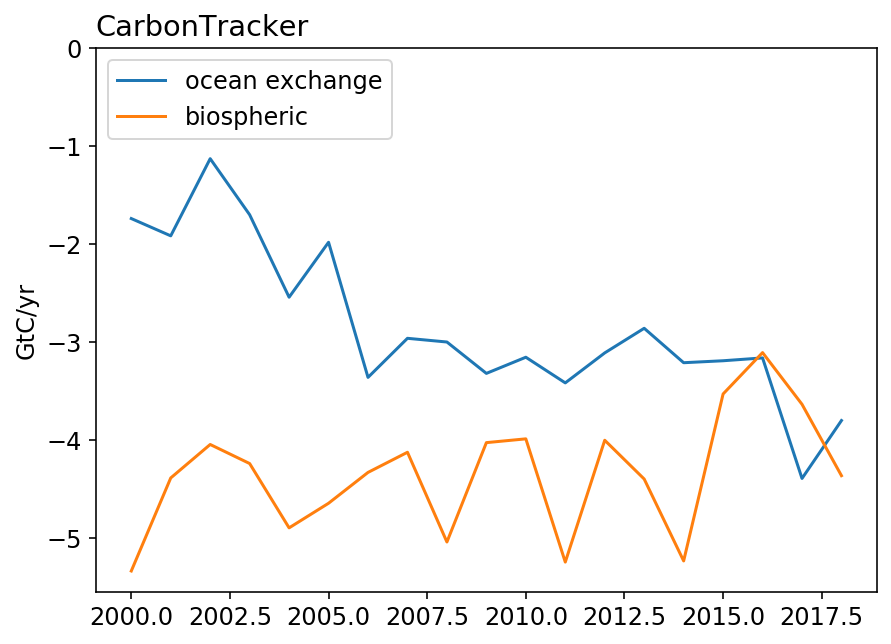

In [11]:
# plot 
fig = plt.figure(figsize=[7, 5])
plt.title('CarbonTracker', loc='left')

plt.plot(year_vector, ocn_emi, label = 'ocean exchange')
plt.plot(year_vector, bio_emi, label = 'biospheric')

plt.ylim(top = 0)
plt.ylabel('GtC/yr')
plt.legend(loc=2)

output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
fig.savefig(output_dir + '/carbontracker_ocean_bio_line.png', dpi = 300)

In [ ]:
# compute climatological ocean and biospheric fluxes
# initialise dataarray
data = ds_ct['ocn_flux_opt']
ocean = xr.DataArray(np.NaN, coords=[data.time[0:12], data.lat, data.lon], dims=['time', 'lat', 'lon'])

data = ds_ct['bio_flux_opt']
bio = xr.DataArray(np.NaN, coords=[data.time[0:12], data.lat, data.lon], dims=['time', 'lat', 'lon'])

bio

In [6]:
# sum up global total
for ilat, lat in enumerate(dr_gc.lat):
    area_tmp = area_latlon(lat1 = lat, 
                            lon1 = dr_gc.lon[10].values, 
                            lat2 = lat + lat_res, 
                            lon2 = dr_gc.lon[10].values + lon_res)
    dr_gc[ilat,:] = dr_gc[ilat,:] * area_tmp *3600*24*366*1e6 # unit: kgCO2/yr
gc_total_original = dr_gc.copy() # plot later, kgCO2/yr/grid cell
total = dr_gc.sum()              # kgCO2/year, same as data description
ann_total = total.values         # kg/yr
ann_total_C_original = total.values*1e-12*12/44  # GtC/yr
    
print('annual total from this calculation:')
print(' ',ann_total_C_original)
print(' ')

annual total from this calculation:
  -5.269060654917819
 


In [7]:
#  CASA 3 hourly, by Liang
input_dir = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2020-04/'
fname     = 'NEE.3hrly.1x1.25.2016.nc'
ds_liang  = xr.open_dataset(input_dir+fname)

lat_res = 1.
lon_res = 1.25
varname = 'NEE'

dr_liang = ds_liang[varname].copy()

In [8]:
for ilat, lat in enumerate(dr_liang.lat):
    area_tmp = area_latlon(lat1 = lat, 
                           lon1 = dr_liang.lon[10].values, 
                           lat2 = lat + lat_res, 
                           lon2 = dr_liang.lon[10].values + lon_res)
    dr_liang[:,ilat,:] = dr_liang[:,ilat,:]*area_tmp*3600*3*1e6 # unit: kgCO2/yr
gc_total_liang = dr_liang.sum(dim = 't-3hr')   # plot later
annual_total = gc_total_liang.sum()
ann_total_C_liang = annual_total.values*1e-12*12/44  # GtC/yr

print('annual total from this calculation:')
print(' ', ann_total_C_liang)
print(' ')

annual total from this calculation:
  -0.5014272916014545
 


In [9]:
# Biosphere, SiB3 balanced Net Ecosystem Production (NEP) CO2
input_dir = '/geos/d21/GC_DATA/ExtData/HEMCO/'
fname = 'CO2/v2015-04/BIO/SiB3_3hr_NEP.nc'
ds_bio  = xr.open_dataset(input_dir+fname)
# year range: 2006 - 2010, get 2010 for this calculation
lat_res = ds_bio.attrs['Delta_Lat']
lon_res = ds_bio.attrs['Delta_Lon']
varname = 'CO2'
unit    = ds_bio[varname].attrs['units']
#ds_bio

In [10]:
# selection a year of data
begin = 4*8*365 + 8 # 2010, last year available
end = 5*8*365 + 8
data = ds_bio[varname][begin:end,:,:].copy()
np.shape(data)

(2920, 181, 288)

In [11]:
# calculate global total emission
#area_lat = np.zeros(len(data.lat))
for ilat, lat in enumerate(data.lat):
    area_tmp = area_latlon(lat1 = lat, 
                            lon1 = data.lon[10].values, 
                            lat2 = lat + lat_res, 
                            lon2 = data.lon[10].values + lon_res)
    #area_lat[ilat] = area_tmp.values
    data[:,ilat,:] = data[:,ilat,:]*area_tmp*3*3600*1e6 # unit: kgCO2/3hours
gc_total_sib = data.sum(dim = 'time')          # kgCO2/year, same as data description
annual_total = gc_total_sib.sum()
ann_total_sib = annual_total.values*1e-12*12/44 # GtC/yr
#plt.plot(data.lat, area_lat)   
print('annual total from this calculation (GtC/yr):')
print(ann_total_sib)

annual total from this calculation (GtC/yr):
-0.060708582493090905


NameError: name 'output_dir' is not defined

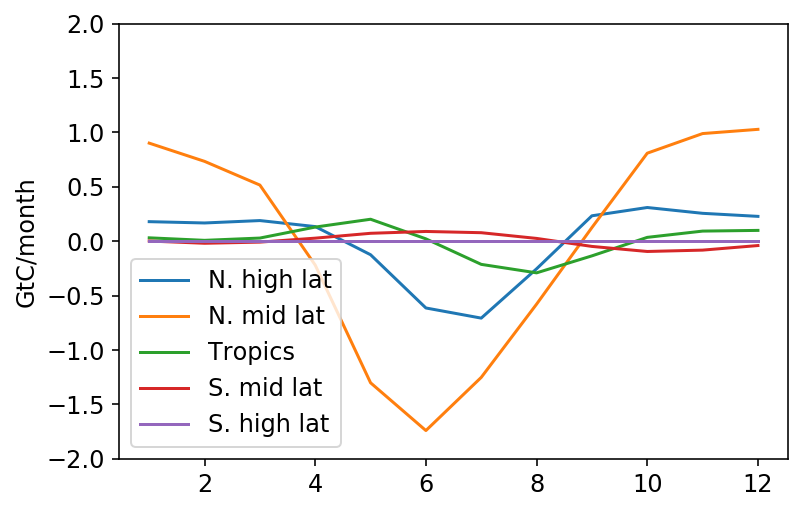

In [12]:
# SIB seasonal cycles
months = np.arange('2010-01', '2011-02', dtype='datetime64[M]')
nh = []
nm = []
tr = [] 
sm = []  
sh = []

for i in range(12):
    nh.append(data.sel(lat = slice(60,90), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    nm.append(data.sel(lat = slice(30,60), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    tr.append(data.sel(lat = slice(-30,30), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    sm.append(data.sel(lat = slice(-60,-30), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    sh.append(data.sel(lat = slice(-90,-60), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)

sib_season = [nh,nm,tr,sm,sh]
lab = ['N. high lat', 'N. mid lat', 'Tropics', 'S. mid lat', 'S. high lat']
fig = plt.figure(figsize=[6, 4])
for i in range(5):
    plt.plot(range(1,13), sib_season[i], label = lab[i])
plt.ylabel('GtC/month')
plt.ylim(-2,2)
plt.legend()

fig.savefig(output_dir + '/seasonal_sib.png', dpi = 300)

In [ ]:
# ODIAC
input_dir = '/exports/csce/datastore/geos/users/msadiq/'
lat_res = 1.
lon_res = 1.
varname1 = 'land'
varname2 = 'intl_bunker'

In [ ]:
ds_odiac = xr.open_dataset(input_dir+'odiac/odiac2019_1x1d_2016.nc')
#ds_odiac['land']

In [ ]:

dr_odiac = ds_odiac[varname1] + ds_odiac[varname2]
days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]

for ilat, lat in enumerate(dr_odiac.lat):
    for imonth in range(12):
        area_tmp = area_latlon(lat1 = lat, 
                                lon1 = dr_odiac.lon[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = dr_odiac.lon[10].values + lon_res)
        dr_odiac[imonth,ilat,:] = dr_odiac[imonth,ilat,:] * area_tmp * days_in_month[imonth] *1e-3 # unit: kgCO2/month
odiac_annual = dr_odiac.sum(dim = 'month')*1e6
total = dr_odiac.sum()*1e6       # kgCO2/year, same as data description
ann_total_odiac = total.values*1e-12  # GtC/yr
    
ann_total_odiac

In [ ]:
# ocean exchange
#filename = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2014-09/OCEAN/Taka2009_CO2_Annual.nc'
filename = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2014-09/OCEAN/Taka2009_CO2_Monthly.nc'
ds_ocean = xr.open_dataset(filename)
lat_res = ds_ocean.attrs['Delta_Lat']
lon_res = ds_ocean.attrs['Delta_Lon']
varname = 'CO2'
unit    = ds_ocean[varname].attrs['units']
dr_ocean = ds_ocean[varname]
ds_ocean

In [ ]:

for ilat, lat in enumerate(dr_ocean.lat):
    for imonth in range(12):
        area_tmp = area_latlon(lat1 = lat, 
                                lon1 = dr_ocean.lon[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = dr_ocean.lon[10].values + lon_res)
        dr_ocean[imonth,ilat,:] = dr_ocean[imonth,ilat,:] * area_tmp * days_in_month[imonth] * 24 * 3600 *1e6  # unit: kgCO2/month
        #dr_ocean[0,ilat,:] = dr_ocean[0,ilat,:] * area_tmp * 24 *366 * 3600 *1e6  # unit: kgCO2/month
ocean_annual = dr_ocean.sum(dim = 'time')
total = dr_ocean.sum()       # kgCO2/year, same as data description
ann_total_ocean = total.values*1e-12*12/44  # GtC/yr
ann_total_ocean

In [ ]:
# plot all 4 fluxes together
fig, axes = plt.subplots(2, 2, 
                         figsize=[14, 6], 
                         subplot_kw={'projection': ccrs.PlateCarree()},
                         gridspec_kw={'hspace': 0.2, 'wspace': 0})

# net terrestrial flux
format_total_odiac = float("{0:.2f}".format(ann_total_odiac))
odiac_annual.plot(ax=axes[0,0], 
                vmax = 3e9,
                vmin = -3e9,
                cmap = 'RdBu_r',
                add_labels = False,
                cbar_kwargs={'shrink': 1})
axes[0,0].set_title('ODIAC fossil fuel 2016', loc='left')
axes[0,0].set_title(' ', loc = 'center')
axes[0,0].set_title(str(format_total_odiac) + ' GtC', loc = 'right')
axes[0,0].coastlines()
axes[0,0].gridlines(linestyle = '--')


# net terrestrial flux
format_total_original = float("{0:.2f}".format(ann_total_C_original))
gc_total_original.plot(ax=axes[0,1], 
                       vmax = 3e9,
                       add_labels = False,
                       cbar_kwargs={'shrink': 1})
axes[0,1].set_title('Net terrestrial', loc='left')
axes[0,1].set_title(' ', loc = 'center')
axes[0,1].set_title(str(format_total_original) + ' GtC', loc = 'right')
axes[0,1].coastlines()
axes[0,1].gridlines(linestyle = '--')

# Ocean, Takahashi, 2009
format_total_ocean = float("{0:.2f}".format(ann_total_ocean))
ocean_annual.plot(ax=axes[1,0],
                    vmax = 8e9,
                    add_labels = False,
                    cbar_kwargs={'shrink': 1})
axes[1,0].set_title('Ocean exchange: Takahashi', loc='left')
axes[1,0].set_title(str(format_total_ocean) + ' GtC', loc = 'right')
axes[1,0].coastlines()
axes[1,0].gridlines(linestyle = '--')

# CASA
format_total_liang = float("{0:.2f}".format(ann_total_C_liang))
gc_total_liang.plot(ax=axes[1,1],
                    vmax = 3e9,
                    add_labels = False,
                    cbar_kwargs={'shrink': 1})
axes[1,1].set_title('CASA 2016', loc='left')
axes[1,1].set_title(str(format_total_liang) + ' GtC', loc = 'right')
axes[1,1].coastlines()
axes[1,1].gridlines(linestyle = '--')

output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
fig.savefig(output_dir + '/co2_fluxes.png', dpi = 300)

In [ ]:
# get time series from year 2008, and change it to 2016, both are leap years
begin = 2*8*365 # 2008, leap year
end   = 3*8*365 + 8
# convert Liang's file format to match GEOS-Chem input
time1 = ds_bio.time[begin:end].values[1]
time2 = np.datetime64('2016-01-01T03:00:00.000000000')
diff = time2 - time1
time = ds_bio.time[begin:end].values + diff
time # time dimension of output data

In [ ]:
foo = xr.DataArray(0., coords=[time, data.lat, data.lon], dims=['time', 'lat', 'lon'])
foo.values = ds_liang['NEE'].values
output = foo.to_dataset(name = 'CO2')
output['CO2'].attrs = ds_bio['CO2'].attrs
output.attrs = ds_bio.attrs
output.attrs['Start_Date'] = '20160101'
output.attrs['End_Date'] = '20161231'
output.attrs['history'] = 'Processed by Mehliyar Sadiq, Apr 2020'

In [ ]:
dr_liang = output['CO2']
lat_res = 1.
lon_res = 1.25
for ilat, lat in enumerate(dr_liang.lat):
    area_tmp = area_latlon(lat1 = lat, 
                           lon1 = dr_liang.lon[10].values, 
                           lat2 = lat + lat_res, 
                           lon2 = dr_liang.lon[10].values + lon_res)
    dr_liang[:,ilat,:] = dr_liang[:,ilat,:]*area_tmp*3600*3*1e6 # unit: kgCO2/yr
gc_total_liang = dr_liang.sum(dim = 'time')   # plot later
annual_total = gc_total_liang.sum()
ann_total_C_liang = annual_total.values*1e-12*12/44  # GtC/yr

print('annual total from this calculation:')
print(' ', ann_total_C_liang)
print(' ')

In [ ]:
# SIB seasonal cycles
months = np.arange('2016-01', '2017-02', dtype='datetime64[M]')
nh = []
nm = []
tr = [] 
sm = []  
sh = []

data = dr_liang.copy()

for i in range(12):
    nh.append(data.sel(lat = slice(60,90), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    nm.append(data.sel(lat = slice(30,60), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    tr.append(data.sel(lat = slice(-30,30), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    sm.append(data.sel(lat = slice(-60,-30), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)
    sh.append(data.sel(lat = slice(-90,-60), time = slice(months[i], months[i+1])).sum() *1e-12*12/44)

casa_season = [nh,nm,tr,sm,sh]

In [ ]:
# plot 2 seasonal cycles
# plot all 4 fluxes together
fig, axes = plt.subplots(1, 2, 
                         figsize=[14, 6], 
                         subplot_kw={'projection': ccrs.PlateCarree()},
                         gridspec_kw={'hspace': 0.2, 'wspace': 0})
# CASA
format_total_liang = float("{0:.2f}".format(ann_total_C_liang))
gc_total_liang.plot(ax=axes[0],
                    vmax = 3e9,
                    add_labels = False,
                    cbar_kwargs={'shrink': 0.5})
axes[0].set_title('CASA 2016', loc='left')
axes[0].set_title(str(format_total_liang) + ' GtC', loc = 'right')
axes[0].coastlines()
axes[0].gridlines(linestyle = '--')

# SiB balanced ecosystem uptake
format_total_sib = float("{0:.2f}".format(ann_total_sib))
gc_total_sib.plot(ax=axes[1],
                  add_labels = False,     
                  vmax = 3e8,
                  label = 'kg/yr',
                  cbar_kwargs={'shrink': 0.5})
axes[1].set_title('SiB 2010', loc='left')
axes[1].set_title(str(format_total_sib) + ' GtC', loc = 'right')
axes[1].coastlines()
axes[1].gridlines(linestyle = '--')

fig.savefig(output_dir + '/casa_sib_annual.png', dpi = 300)

In [ ]:
# plot 2 seasonal cycles
fig, axes = plt.subplots(1, 2, figsize=[13, 4])

for i in range(5):
    axes[0].plot(range(1,13), casa_season[i], label = lab[i])
axes[0].set_ylabel('GtC/month')
axes[0].set_ylim(-0.4,0.4)
axes[0].legend()
axes[0].set_title('CASA 2016')

for i in range(5):
    axes[1].plot(range(1,13), sib_season[i], label = lab[i])
axes[1].set_ylabel('GtC/month')
axes[1].set_ylim(-2,2)
axes[1].legend()
axes[1].set_title('SiB 2010')

fig.savefig(output_dir + '/casa_sib_seasonal.png', dpi = 300)

In [ ]:
output.to_netcdf('/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2020-04/NEE.Liang.2016.nc')